# Лекция №3

## Simple Thresholding

Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is __cv2.threshold__. First argument is the source image, which __should be a grayscale image__. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

cv2.THRESH_BINARY

cv2.THRESH_BINARY_INV

cv2.THRESH_TRUNC

cv2.THRESH_TOZERO

cv2.THRESH_TOZERO_INV

Documentation clearly explain what each type is meant for. Please check out the documentation.

Two outputs are obtained. First one is a __retval__ which will be explained later. Second output is our thresholded image.

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

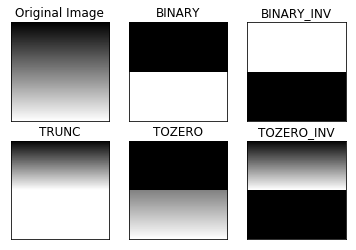

In [25]:
img = cv2.imread('img/grad_grayscale.png',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

Adaptive Method - It decides how thresholding value is calculated.

cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
Block Size - It decides the size of neighbourhood area.

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

Below piece of code compares global thresholding and adaptive thresholding for an image with varying illumination:

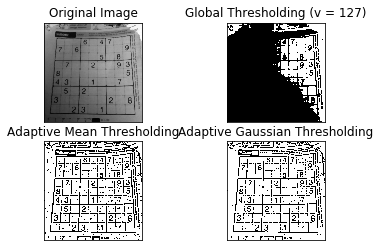

In [35]:
img = cv2.imread('img/sudoku.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu’s Binarization
In the first section, I told you there is a second parameter retVal. Its use comes when we go for Otsu’s Binarization. So what is it?

In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected is good or not? Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)

For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

Check out below example. Input image is a noisy image. In first case, I applied global thresholding for a value of 127. In second case, I applied Otsu’s thresholding directly. In third case, I filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.

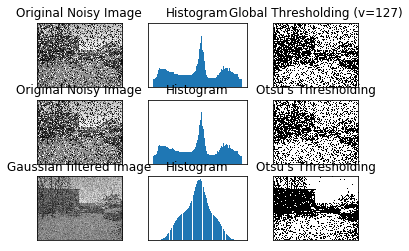

In [41]:
img = cv2.imread('img/laba.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.random.rand(*noise_img.shape)*np.max(noise_img)
noise_img[mask] = r[mask]

img = noise_img


# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

Как работает merge нескольких методов для трешхолда?
***
Разобраться надо с распределением на зашумленной гистограмме

# Контур и как его найти

## Оператор Лапласа

It calculates the Laplacian of the image given by the relation,
$
\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}
$
where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:
$$
\begin{equation*}
\ K = \begin{vmatrix}
0 & \ 1 & \ 0 \\ 
1 & \ -4 & \ 1 \\ 
0 & \ 1 & \ 0 
\end{vmatrix}
\end{equation*}
$$

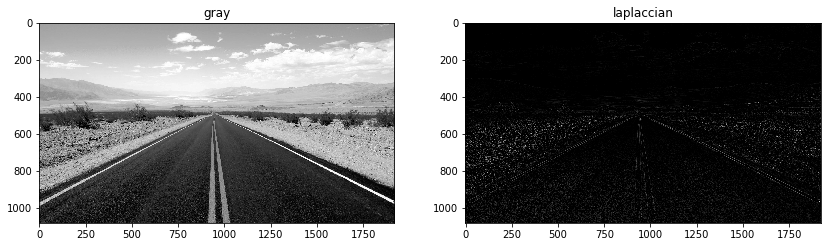

In [12]:
img = cv2.imread('img/road_2.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplac = cv2.Laplacian(gray_img, cv2.THRESH_BINARY, scale=0.01, ksize=5)

fig, m_axs = plt.subplots(1,2, figsize=(14,12))
ax1, ax2 = m_axs

ax1.set_title('gray')
ax1.imshow(gray_img, cmap='gray')
ax2.set_title('laplaccian')
ax2.imshow(laplac, cmap='gray');

## Детектор границ Кенни (Canny)

https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%9A%D1%8D%D0%BD%D0%BD%D0%B8

Theory
Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. __Canny in:__

1. It is a multi-stage algorithm and we will go through each stages.

2. __Noise Reduction__

Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. We have already seen this in previous chapters.

3. __Finding Intensity Gradient of the Image__

Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ( Gx) and vertical direction ( Gy). From these two images, we can find edge gradient and direction for each pixel as follows:

$$
Edge(G) = \sqrt{ G_x^2 + G_y^2}
$$
$$
Angle(\theta) = \tan^{-1}(\frac{G_x}{G_y})
$$

Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

4. __Non-maximum Suppression__

After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Check the image below:

img

Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

In short, the result you get is a binary image with "thin edges".

5. __Hysteresis Thresholding__

This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

img

The edge A is above the maxVal, so considered as "sure-edge". Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

This stage also removes small pixels noises on the assumption that edges are long lines.

So what we finally get is strong edges in the image.

### Canny Edge Detection in OpenCV

OpenCV puts all the above in single function, __cv2.Canny()__. We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient($G$) = |$G_x$| + |$G_y$|. By default, it is False.


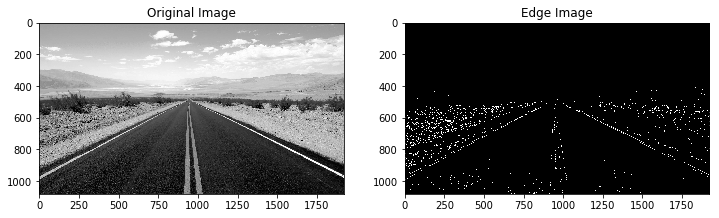

In [65]:
img = cv2.imread('img/road_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#img = cv2.resize(img, (1500, 1000))

#sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
edges = cv2.Canny(img,360,360,5)

fig, m_axs = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = m_axs

ax1.set_title('Original Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('Edge Image')
ax2.imshow(edges, cmap='gray');


__Контрольные вопросы:__

В чем минусы сразу брать границы у такого изображения?

Можно настроить параметы алгоритма так, чтобы выделить здание?

Что нужно исправить с картинкой?
***
Почему это работает плохо тут?
Где будет работать хорошо? Зачем это нужно? (выделения полосы движения на дороге, локальные задачи поиска предметов)

Выделить цвет, который характерен для исследуемого объекта, затем применить поиск границ

# Самостоятельная работа

## Микс из разных операторов для выделения границ

несколько примеров о последовательном приминении фильтров для выделения границ на разных изображениях

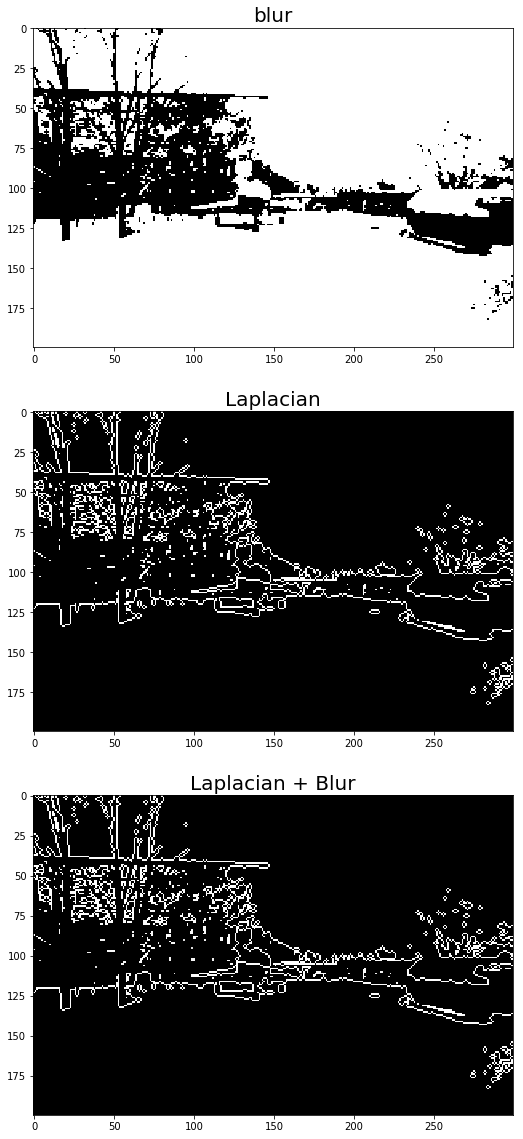

In [18]:
# Теперь пощупаем несколько филттров и их комбинации --- Это для лекции №3
## сюда же морфологию еще прикрутить
 
    
img = cv2.imread('img/laba.jpg')
img = cv2.resize(img.copy(), (600, 400))
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
## Лапласиан 
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)/0.1

## переведем изображение в оттенки серого - цвет нам тут не нужен
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)


## Попробуем несколько типов блюра 
blur = cv2.blur(gray, (3,3))                       ## осреднение значений в ядре 
gaus_blur = cv2.GaussianBlur(gray, (5,5), 0)       ## гауссов блюр 
median_blur = cv2.medianBlur(gray, 5)              ## медиана всех значений в ядре 
bil_blur = cv2.bilateralFilter(gray, 9, 75, 75)    ## двусторонниый фильтр 
pyr_d = cv2.pyrDown(gray)                          ## blur & downsampling
pyr_u = cv2.pyrUp(gray)                            ## blur & upsampling 
#pyr_mean = cv2.pyrMeanShiftFiltering(img, 25, 40)  ## выделяет области по цвету (аналог knn в машинке)

#gray_pyr_mean = cv2.cvtColor(pyr_mean, cv2.COLOR_RGB2GRAY)

## Применяем фильтры 
dst = cv2.filter2D(threshold, -1, kernel)           ## находим границы лапласианом
#dst_blur = cv2.GaussianBlur(dst, (5,5),0)
kernel = np.ones((5,5),np.uint8)
dst_blur = cv2.bilateralFilter(dst,9,75,75)                  ## еще раз блюрим для гладких границ 

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

plt.gray()
ax1.set_title('blur', fontsize=20)
ax1.imshow(threshold)
ax2.set_title('Laplacian', fontsize=20)
ax2.imshow(dst)
ax3.set_title('Laplacian + Blur', fontsize=20)
ax3.imshow(dst_blur);

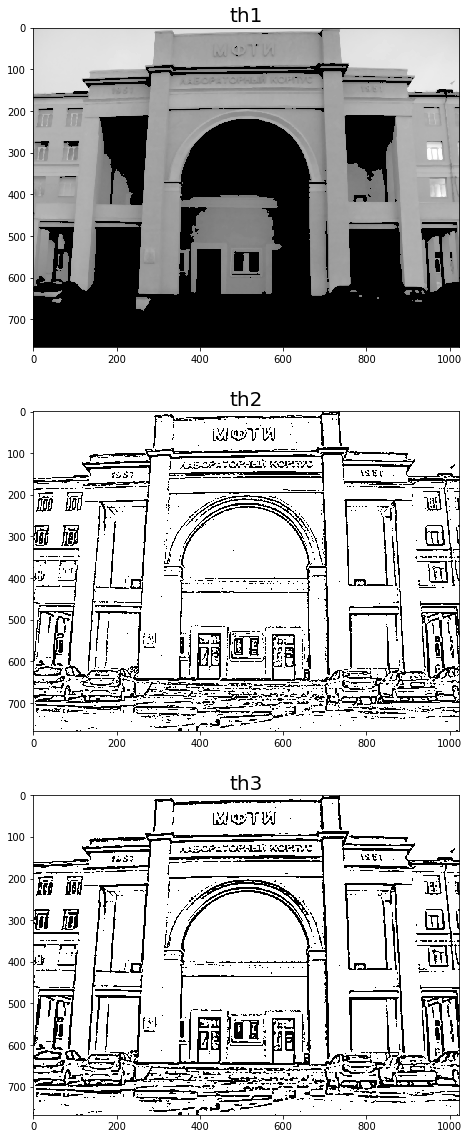

In [29]:
img = cv2.imread('img/lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.medianBlur(img, 5)
#img = cv2.pyrMeanShiftFiltering(img, 25, 40)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th1 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)[1]
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

plt.gray()
ax1.set_title('th1', fontsize=20)
ax1.imshow(th1)
ax2.set_title('th2', fontsize=20)
ax2.imshow(th2)
ax3.set_title('th3', fontsize=20)
ax3.imshow(th3);

## Преобразования Хафа

Theory
Hough Transform is a popular technique to detect any shape, if you can represent that shape in mathematical form. It can detect the shape even if it is broken or distorted a little bit. We will see how it works for a line.

A line can be represented as y=mx+c or in parametric form, as ρ=xcosθ+ysinθ where ρ is the perpendicular distance from origin to the line, and θ is the angle formed by this perpendicular line and horizontal axis measured in counter-clockwise ( That direction varies on how you represent the coordinate system. This representation is used in OpenCV). Check below image:

...image


So if line is passing below the origin, it will have a positive rho and angle less than 180. If it is going above the origin, instead of taking angle greater than 180, angle is taken less than 180, and rho is taken negative. Any vertical line will have 0 degree and horizontal lines will have 90 degree.

Now let's see how Hough Transform works for lines. Any line can be represented in these two terms, (ρ,θ). So first it creates a 2D array or accumulator (to hold values of two parameters) and it is set to 0 initially. Let rows denote the ρ and columns denote the θ. Size of array depends on the accuracy you need. Suppose you want the accuracy of angles to be 1 degree, you need 180 columns. For ρ, the maximum distance possible is the diagonal length of the image. So taking one pixel accuracy, number of rows can be diagonal length of the image.

Consider a 100x100 image with a horizontal line at the middle. Take the first point of the line. You know its (x,y) values. Now in the line equation, put the values θ=0,1,2,....,180 and check the ρ you get. For every (ρ,θ) pair, you increment value by one in our accumulator in its corresponding (ρ,θ) cells. So now in accumulator, the cell (50,90) = 1 along with some other cells.

Now take the second point on the line. Do the same as above. Increment the the values in the cells corresponding to (rho, theta) you got. This time, the cell (50,90) = 2. What you actually do is voting the (ρ,θ) values. You continue this process for every point on the line. At each point, the cell (50,90) will be incremented or voted up, while other cells may or may not be voted up. This way, at the end, the cell (50,90) will have maximum votes. So if you search the accumulator for maximum votes, you get the value (50,90) which says, there is a line in this image at distance 50 from origin and at angle 90 degrees. It is well shown in below animation:

<img src="img/houghlinesdemo.gif" alt="Drawing" style="width: 400px;"/>

This is how hough transform for lines works. It is simple, and may be you can implement it using Numpy on your own. Below is an image which shows the accumulator. Bright spots at some locations denotes they are the parameters of possible lines in the image.

 Расшар
 http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm

## Hough Transform in OpenCV

Everything explained above is encapsulated in the OpenCV function, __cv2.HoughLines()__. It simply returns an array of $(\rho, \theta)$ values. ρ is measured in pixels and θ is measured in radians. First parameter, Input image should be a binary image, so apply threshold or use canny edge detection before finding applying hough transform. Second and third parameters are ρ and θ accuracies respectively. Fourth argument is the threshold, which means minimum vote it should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.

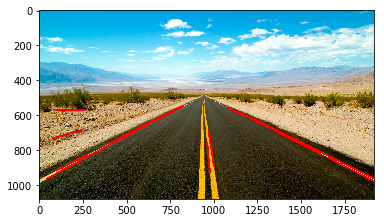

In [98]:
img = cv2.imread('img/road_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 350, 450, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=150, maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),10)
    
plt.imshow(img);